In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd 
from pandas import Series, DataFrame

import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
iris = pd.read_csv("Iris.csv")

In [6]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
help(pd)
help(iris)

Help on package pandas:

NAME
    pandas

DESCRIPTION
    pandas - a powerful data analysis and manipulation library for Python
    
    **pandas** is a Python package providing fast, flexible, and expressive data
    structures designed to make working with "relational" or "labeled" data both
    easy and intuitive. It aims to be the fundamental high-level building block for
    doing practical, **real world** data analysis in Python. Additionally, it has
    the broader goal of becoming **the most powerful and flexible open source data
    analysis / manipulation tool available in any language**. It is already well on
    its way toward this goal.
    
    Main Features
    -------------
    Here are just a few of the things that pandas does well:
    
      - Easy handling of missing data in floating point as well as non-floating
        point data
      - Size mutability: columns can be inserted and deleted from DataFrame and
        higher dimensional objects
      - Automatic and

In [8]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [9]:
iris.drop("Id", axis=1, inplace = True) #removing un needed column

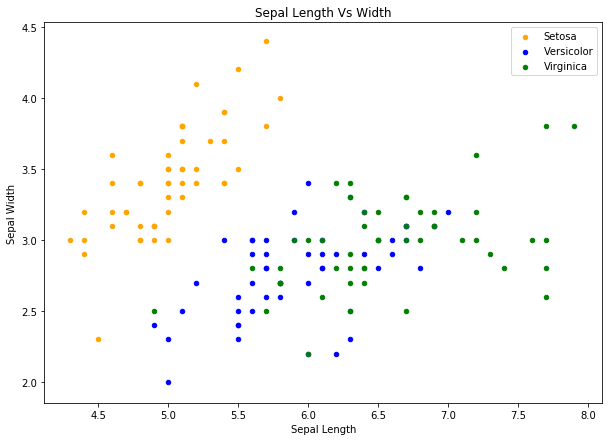

In [10]:
#some EDA with Iris
fig = iris[iris.Species == 'Iris-setosa'].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', color='orange', label='Setosa')
iris[iris.Species == 'Iris-versicolor'].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', color='blue', label='Versicolor', ax=fig)
iris[iris.Species == 'Iris-virginica'].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', color='green', label='Virginica', ax=fig)

fig.set_xlabel('Sepal Length')
fig.set_ylabel('Sepal Width')
fig.set_title('Sepal Length Vs Width')

fig=plt.gcf()
fig.set_size_inches(10, 7)
plt.show()

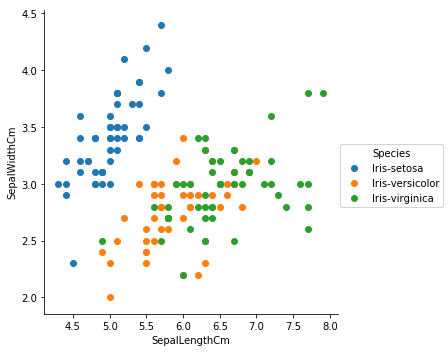

In [11]:
sns.FacetGrid(iris, hue='Species', size=5)\
.map(plt.scatter, 'SepalLengthCm', 'SepalWidthCm')\
.add_legend()

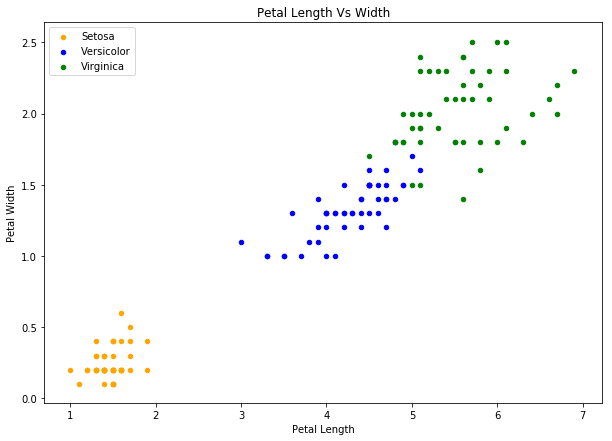

In [12]:
fig = iris[iris.Species == 'Iris-setosa'].plot(kind='scatter', x='PetalLengthCm', y='PetalWidthCm', color='orange', label='Setosa')
iris[iris.Species == 'Iris-versicolor'].plot(kind='scatter', x='PetalLengthCm', y='PetalWidthCm', color='blue', label='Versicolor', ax=fig)
iris[iris.Species == 'Iris-virginica'].plot(kind='scatter', x='PetalLengthCm', y='PetalWidthCm', color='green', label='Virginica', ax=fig)

fig.set_xlabel('Petal Length')
fig.set_ylabel('Petal Width')
fig.set_title('Petal Length Vs Width')

fig=plt.gcf()
fig.set_size_inches(10, 7)
plt.show()


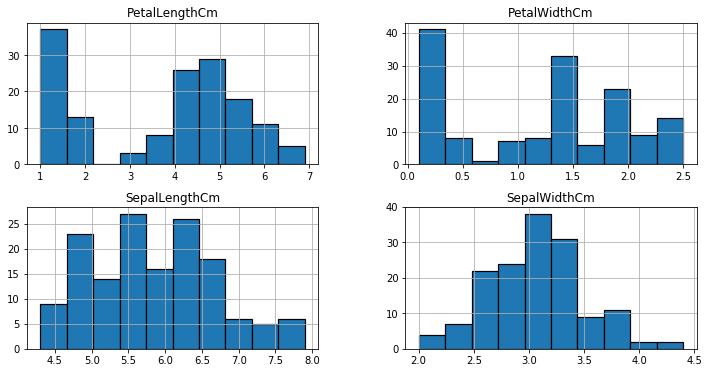

In [13]:
iris.hist(edgecolor='black', linewidth=1.2)
fig = plt.gcf()
fig.set_size_inches(12,6)
plt.show()

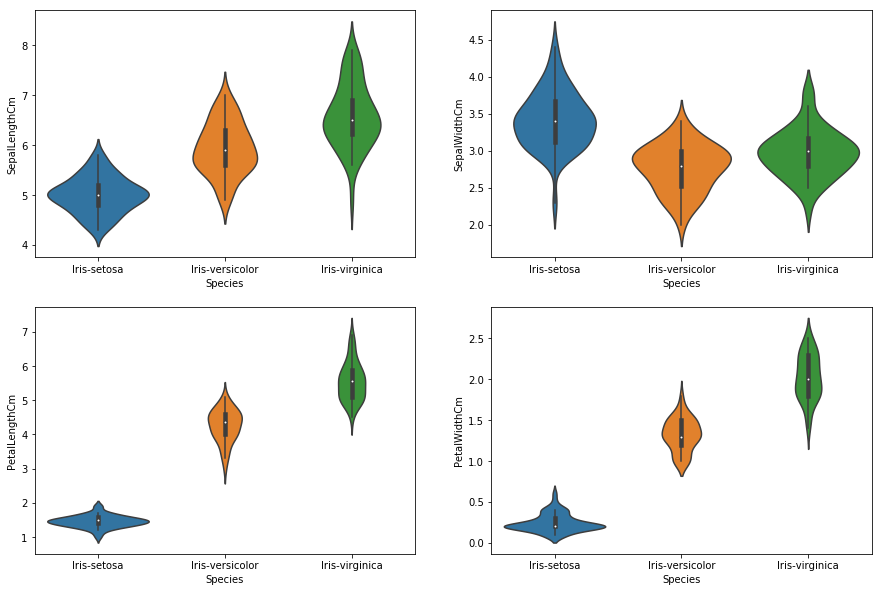

In [14]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species', y = 'SepalLengthCm', data=iris)
plt.subplot(2,2,2)
sns.violinplot(x='Species', y = 'SepalWidthCm', data=iris)

plt.subplot(2,2,3)
sns.violinplot(x='Species', y = 'PetalLengthCm', data=iris)
plt.subplot(2,2,4)
sns.violinplot(x='Species', y = 'PetalWidthCm', data=iris)

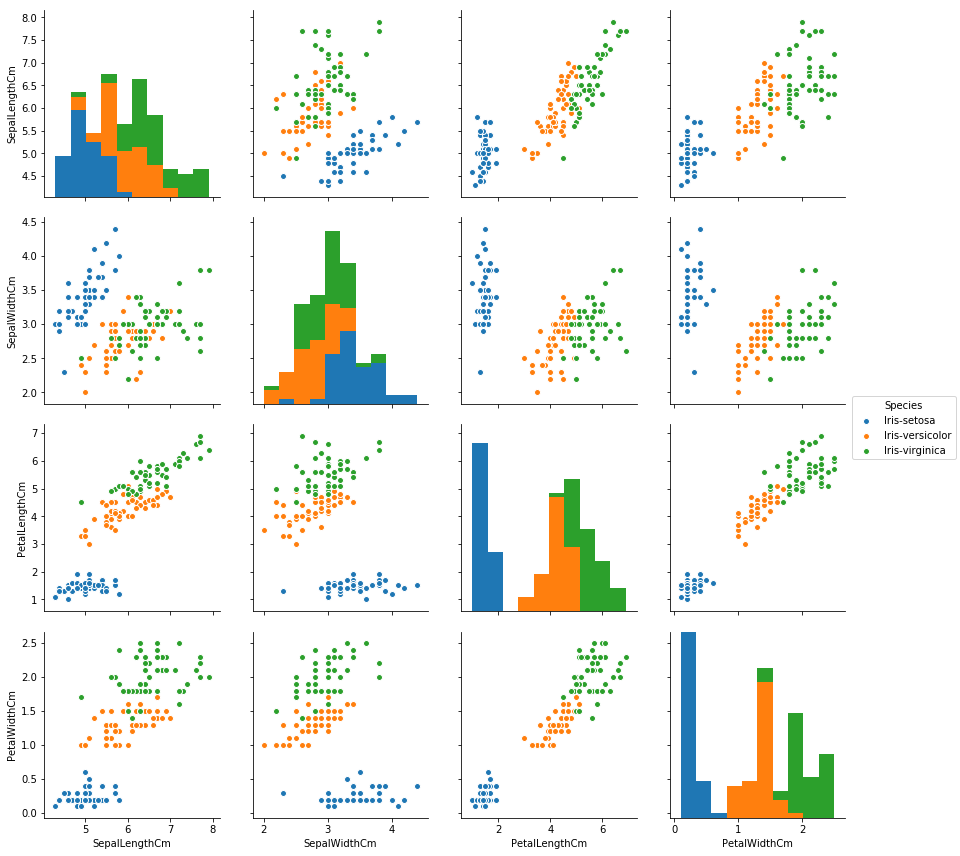

In [15]:
sns.pairplot(iris, hue='Species', size=3)

In [16]:
#Classification algorithms to build a model for a classification problem

In [17]:
# importing all the necessary packages to use the various classification algorithms
from sklearn.linear_model import LogisticRegression # for Logistic Regression Algorithm
from sklearn.cross_validation import train_test_split # to split the dataset for training and testing 
from sklearn.neighbors import KNeighborsClassifier # KNN classifier
from sklearn import svm # for suport vector machine algorithm
from sklearn import metrics # for checking the model accuracy
from sklearn.tree import DecisionTreeClassifier # for using DTA

/opt/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [18]:
iris.shape

(150, 5)

In [19]:
#Check the correlation

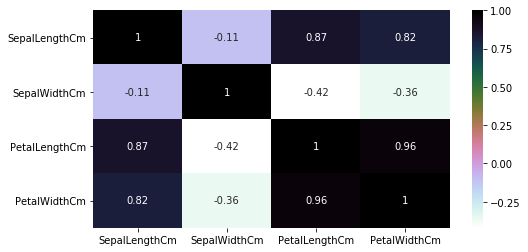

In [20]:
plt.figure(figsize=(8,4))
sns.heatmap(iris.corr(), annot=True, cmap='cubehelix_r') # draws heatmap with input as correlation matrix calculated by iris.corr() 
plt.show()


In [21]:
#Splitting The Data into Training And Testing Dataset

In [22]:
train, test = train_test_split(iris, test_size=0.3) # our main data split into train and test
# the attribute test_size=0.3 splits the data into 70% and 30% ratio. train=70% and test=30%
print(train.shape)
print(test.shape)

(105, 5)
(45, 5)


In [23]:
train_X = train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']] # taking the training data features
train_y = train.Species # output of the training data

test_X = test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']] # taking test data feature
test_y = test.Species # output value of the test data

In [24]:
train_X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
76,6.8,2.8,4.8,1.4
121,5.6,2.8,4.9,2.0
115,6.4,3.2,5.3,2.3
92,5.8,2.6,4.0,1.2
72,6.3,2.5,4.9,1.5


In [25]:
test_X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
96,5.7,2.9,4.2,1.3
17,5.1,3.5,1.4,0.3
37,4.9,3.1,1.5,0.1
22,4.6,3.6,1.0,0.2
41,4.5,2.3,1.3,0.3


In [26]:
train_y.head()

76     Iris-versicolor
121     Iris-virginica
115     Iris-virginica
92     Iris-versicolor
72     Iris-versicolor
Name: Species, dtype: object

In [27]:
# Applying Support Vector Machine SVM

In [28]:
model = svm.SVC() # select the svm algorithm
# we train the algorithm with training data and training output
model.fit(train_X, train_y)
# we pass the testing data to the stored algorithm to predict the outcome
prediction = model.predict(test_X)
print('The accuracy of the SVM is: ', metrics.accuracy_score(prediction, test_y)) # we check the accuracy of the algorithm
#we pass the predicted output by the model and the actual output

The accuracy of the SVM is:  0.9777777777777777


In [29]:
#The accuracy of SVM is: 97.78 percent which is on the higher side.

In [30]:
#For other Machine Learning algorithms
#1.Logistic Regression

In [31]:
model = LogisticRegression() #select the logistic regression algorithm
# we train the algorithm with training data and training output
model.fit(train_X, train_y)
# we pass the testing data to the stored algorithm to predict the outcome
prediction = model.predict(test_X)
print('The accuracy of the LoggisticRegression is: ', metrics.accuracy_score(prediction, test_y)) # we check the accuracy of the algorithm
#we pass the predicted output by the model and the actual output

The accuracy of the LoggisticRegression is:  0.9333333333333333


In [32]:
#The accuracy of LogisticRegression Algorithm is 0.9333.... or 93.33% which is on the overall higher side but has a less accuracy than Support Vector Machine(SVM) 

In [33]:
#Lets check the accuracy using the Decision Tree
#2.Decision Tree

In [34]:
model = DecisionTreeClassifier() #select the Decision Tree algorithm
# we train the algorithm with training data and training output
model.fit(train_X, train_y)
# we pass the testing data to the stored algorithm to predict the outcome
prediction = model.predict(test_X)
print('The accuracy of the Decision Tree is: ', metrics.accuracy_score(prediction, test_y)) # we check the accuracy of the algorithm
#we pass the predicted output by the model and the actual output

The accuracy of the Decision Tree is:  0.9555555555555556


In [35]:
#As we can see that the accuracy of the Decision Tree is greater(0.9555...) than LogisticRegression Algorithm(0.93333...) but still less than the SVM(0.9777...)

In [36]:
#Now I'll try calculating the accuracy for K-Nearest Neighbors
#3.K-Nearest Neighbors

In [37]:
model = KNeighborsClassifier(n_neighbors=3) # this examines 3 neighbors for putting the data into class
# we train the algorithm with training data and training output
model.fit(train_X, train_y)
# we pass the testing data to the stored algorithm to predict the outcome
prediction = model.predict(test_X)
print('The accuracy of the K-Nearest Neighbors is: ', metrics.accuracy_score(prediction, test_y)) # we check the accuracy of the algorithm
#we pass the predicted output by the model and the actual output

The accuracy of the K-Nearest Neighbors is:  0.9555555555555556


In [38]:
#I got the accuracy of after implementing Decision Tree and K-nearest neighbors same, i.e., 0.955555...... 

In [39]:
#Now Let's try changing the parameters to improve the results for each algorithm.

In [42]:
#a. K-Nearest Neighbors
model = KNeighborsClassifier(n_neighbors=10) # this examines 10 neighbors for putting the data into class
# we train the algorithm with training data and training output
model.fit(train_X, train_y)
# we pass the testing data to the stored algorithm to predict the outcome
prediction = model.predict(test_X)
print('The accuracy of the K-Nearest Neighbors is: ', metrics.accuracy_score(prediction, test_y)) # we check the accuracy of the algorithm
#we pass the predicted output by the model and the actual output

The accuracy of the K-Nearest Neighbors is:  0.9777777777777777


In [43]:
#As we can see above, I changed the parameter of neighbors from intial 3 to 10 neighbors. In this case, I got a rather higher efficiency of near 97.78%.. or 0.9777.. which is similar to the SVM(accuracy at 0.9777...)

In [44]:
#2. Lets try another parameter for K-nearest neighbours and check whether the accuracy can be improved more or not.

In [45]:
#K-Nearest Neighbors
model = KNeighborsClassifier(n_neighbors=20) # this examines 20 neighbors for putting the data into class
# we train the algorithm with training data and training output
model.fit(train_X, train_y)
# we pass the testing data to the stored algorithm to predict the outcome
prediction = model.predict(test_X)
print('The accuracy of the K-Nearest Neighbors is: ', metrics.accuracy_score(prediction, test_y)) # we check the accuracy of the algorithm
#we pass the predicted output by the model and the actual output

The accuracy of the K-Nearest Neighbors is:  0.9555555555555556


In [46]:
#For n_neighbors=20, the accuracy again went down to 0.955555....
#Lets select a value between 10 and 20 and check whether the higher accuracy can be achieved or not.
#K-Nearest Neighbors
model = KNeighborsClassifier(n_neighbors=15) # this examines 15 neighbors for putting the data into class
# we train the algorithm with training data and training output
model.fit(train_X, train_y)
# we pass the testing data to the stored algorithm to predict the outcome
prediction = model.predict(test_X)
print('The accuracy of the K-Nearest Neighbors is: ', metrics.accuracy_score(prediction, test_y)) # we check the accuracy of the algorithm
#we pass the predicted output by the model and the actual output

The accuracy of the K-Nearest Neighbors is:  0.9555555555555556


In [47]:
#For n_neighbors=13,
model = KNeighborsClassifier(n_neighbors=13) # this examines 13 neighbors for putting the data into class
# we train the algorithm with training data and training output
model.fit(train_X, train_y)
# we pass the testing data to the stored algorithm to predict the outcome
prediction = model.predict(test_X)
print('The accuracy of the K-Nearest Neighbors is: ', metrics.accuracy_score(prediction, test_y)) # we check the accuracy of the algorithm
#we pass the predicted output by the model and the actual output

The accuracy of the K-Nearest Neighbors is:  0.9777777777777777


In [48]:
#For n_neighbors=14
model = KNeighborsClassifier(n_neighbors=14) # this examines 14 neighbors for putting the data into class
# we train the algorithm with training data and training output
model.fit(train_X, train_y)
# we pass the testing data to the stored algorithm to predict the outcome
prediction = model.predict(test_X)
print('The accuracy of the K-Nearest Neighbors is: ', metrics.accuracy_score(prediction, test_y)) # we check the accuracy of the algorithm
#we pass the predicted output by the model and the actual output

The accuracy of the K-Nearest Neighbors is:  0.9777777777777777


In [49]:
#For n_neighbors=8
model = KNeighborsClassifier(n_neighbors=8) # this examines 8 neighbors for putting the data into class
# we train the algorithm with training data and training output
model.fit(train_X, train_y)
# we pass the testing data to the stored algorithm to predict the outcome
prediction = model.predict(test_X)
print('The accuracy of the K-Nearest Neighbors is: ', metrics.accuracy_score(prediction, test_y)) # we check the accuracy of the algorithm
#we pass the predicted output by the model and the actual output

The accuracy of the K-Nearest Neighbors is:  0.9777777777777777


In [50]:
#For n_neighbors=6
model = KNeighborsClassifier(n_neighbors=6) # this examines 6 neighbors for putting the data into class
# we train the algorithm with training data and training output
model.fit(train_X, train_y)
# we pass the testing data to the stored algorithm to predict the outcome
prediction = model.predict(test_X)
print('The accuracy of the K-Nearest Neighbors is: ', metrics.accuracy_score(prediction, test_y)) # we check the accuracy of the algorithm
#we pass the predicted output by the model and the actual output

The accuracy of the K-Nearest Neighbors is:  0.9777777777777777


In [51]:
#For n_neighbors=5
model = KNeighborsClassifier(n_neighbors=5) # this examines 5 neighbors for putting the data into class
# we train the algorithm with training data and training output
model.fit(train_X, train_y)
# we pass the testing data to the stored algorithm to predict the outcome
prediction = model.predict(test_X)
print('The accuracy of the K-Nearest Neighbors is: ', metrics.accuracy_score(prediction, test_y)) # we check the accuracy of the algorithm
#we pass the predicted output by the model and the actual output

The accuracy of the K-Nearest Neighbors is:  0.9777777777777777


In [52]:
#For n_neighbors=4
model = KNeighborsClassifier(n_neighbors=4) # this examines 4 neighbors for putting the data into class
# we train the algorithm with training data and training output
model.fit(train_X, train_y)
# we pass the testing data to the stored algorithm to predict the outcome
prediction = model.predict(test_X)
print('The accuracy of the K-Nearest Neighbors is: ', metrics.accuracy_score(prediction, test_y)) # we check the accuracy of the algorithm
#we pass the predicted output by the model and the actual output

The accuracy of the K-Nearest Neighbors is:  0.9555555555555556


In [53]:
#For n_neighbors=15
model = KNeighborsClassifier(n_neighbors=15) # this examines 15 neighbors for putting the data into class
# we train the algorithm with training data and training output
model.fit(train_X, train_y)
# we pass the testing data to the stored algorithm to predict the outcome
prediction = model.predict(test_X)
print('The accuracy of the K-Nearest Neighbors is: ', metrics.accuracy_score(prediction, test_y)) # we check the accuracy of the algorithm
#we pass the predicted output by the model and the actual output

The accuracy of the K-Nearest Neighbors is:  0.9555555555555556


In [54]:
#For K-nearest neighbors(parameters: n_neighbors=5 to n_neighbors=14), we have attained the highest accuracy for the dataset at 0.97777... i.e near 97.78%

In [57]:
#subsection:2 How to do cross validation on the Iris dataset


In [101]:
#The second part of the question requires us to discover one of the new functions that haven't been demonstrated in class
#For this I am going to try implementing and analyzing Cross-validation on the Iris dataset.

In [115]:
# A brief insight to what I am planning to do exactly,
#After doing a detailed study of the methods and fathoming deeper into the exploration of Cross -validation technique, I will try implementing 10-FOLD Cross validation technique for the K-nearest neighbor classifier on the iris dataset.
#I am going to predict the best value of K in K-nearest neighbors classifier which would give the highest accuracy using 10-fold cross validation.
from sklearn.cross_validation import cross_val_score #for performing cross-validation for the inputted function(knn in this case)


In [116]:
# search for an optimal value of K for KNN

# range of k we want to try
k_range = range(1, 31)
# empty list to store scores
k_scores = []
#we will loop through reasonable values of k
for k in k_range:
    #run KNN Classifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k)
    #obtain cross_val_score for KNN Classifier with k neighbours
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    #append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())
print(k_scores)

[0.96, 0.9533333333333334, 0.9666666666666666, 0.9666666666666666, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9800000000000001, 0.9666666666666666, 0.9666666666666666, 0.9733333333333334, 0.96, 0.9666666666666666, 0.96, 0.9666666666666666, 0.9533333333333334, 0.9533333333333334, 0.9533333333333334]


In [117]:
# Means I tried running the 10-fold cross-validation method 30 times because we want to run through K values from 1 to 30
# we should have 30 scores here
print('Length of list', len(k_scores))
print('Max of list', max(k_scores))

Length of list 30
Max of list 0.9800000000000001


Text(0,0.5,'cross-validation accuracy')

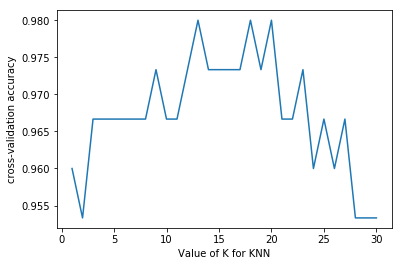

In [119]:
# plot how accuracy changes as we vary k
import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of K for KNN (x-axis) versus the cross-validation accuracy (y-axis)
# plt.plot(x_axis, y_axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('cross-validation accuracy')

In [ ]:
#As we can see, the maximum cross-validation accuracy occurs in the range of k=13 to k=20
#Here I wanted to learn more about how I can figure out the best value of K since the accuracy is near equivalent for K=13,K=18,K=20. 
#For that, I googled to learn more about selecting the best value and came across the concept of Bias-variance Trade off.
#Based on the learning I came to know that the best value should be the one with the highest value of K because of the higher values produces less complex model.
#Hence, Best value of K for KNearestNeighbors should be 20(k=20).